### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

In [3]:
filePath = '/Users/sanjithsivapuram/Documents/Education/University Of Michigan Dearborn/Data Science Course/Semester 2/Intelligent Systems/Project/Dataset/S&P.csv'

### Understanding the Data

#### Metadata of the Data Frame

In [4]:
stock_df_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name']
stock_df = pd.read_csv(filePath, names=stock_df_columns, skiprows=1)
stock_df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
stock_df.shape

(619040, 7)

In [6]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    619040 non-null  object 
 1   Open    619029 non-null  float64
 2   High    619032 non-null  float64
 3   Low     619032 non-null  float64
 4   Close   619040 non-null  float64
 5   Volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


#### Data Pre-Processing

In [7]:
stock_df.isnull().sum()

Date       0
Open      11
High       8
Low        8
Close      0
Volume     0
Name       0
dtype: int64

In [8]:
stock_df['Open'] = stock_df['Open'].fillna(stock_df.groupby('Name')['Open'].transform('mean'))

In [9]:
stock_df['High'] = stock_df['High'].fillna(stock_df.groupby('Name')['High'].transform('mean'))

In [10]:
stock_df['Low'] = stock_df['Low'].fillna(stock_df.groupby('Name')['Low'].transform('mean'))

In [11]:
stock_df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [12]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [13]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    619040 non-null  datetime64[ns]
 1   Open    619040 non-null  float64       
 2   High    619040 non-null  float64       
 3   Low     619040 non-null  float64       
 4   Close   619040 non-null  float64       
 5   Volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [14]:
stock_df.duplicated().sum()

0

In [15]:
from scipy import stats
stock_df['z_score'] = stats.zscore(stock_df['Close'])

In [16]:
stock_df.head()

,Date,Open,High,Low,Close,Volume,Name,z_score
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-0.701242
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.704220
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.706171
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,-0.702166
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.709046


In [17]:
stock_df.shape

(619040, 8)

In [18]:
threshold = 3
outliers = stock_df[(stock_df['z_score'] > threshold) | (stock_df['z_score'] < -threshold)]
outliers.shape

(8508, 8)

In [19]:
stock_df = stock_df[(stock_df['z_score'] < threshold) & (stock_df['z_score'] > -threshold)]
stock_df.shape

(610532, 8)

In [20]:
stock_df.drop('z_score', axis=1, inplace=True)
stock_df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


#### Added New Features to the DataFrame

In [21]:
stock_df['Daily_Returns'] = stock_df.groupby('Name')['Close'].pct_change()
stock_df['Daily_Returns'].fillna(0, inplace=True)

#### Getting useful features from date

In [22]:
stock_df['Year'] = stock_df['Date'].dt.year
stock_df['Quarter'] = stock_df['Date'].dt.quarter
stock_df['Month'] = stock_df['Date'].dt.month
stock_df['Week'] = stock_df['Date'].dt.isocalendar().week
stock_df['Day'] = stock_df['Date'].dt.day
# Monday=0, Sunday=6
stock_df['DayOfWeek'] = stock_df['Date'].dt.dayofweek
# 1 for weekend and 0 for weekdays
stock_df['IsWeekend'] = stock_df['DayOfWeek'].isin([5, 6]).astype(int)

In [23]:
stock_df.head()

,Date,Open,High,Low,Close,Volume,Name,Daily_Returns,Year,Quarter,Month,Week,Day,DayOfWeek,IsWeekend
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,0.000000,2013,1,2,6,8,4,0
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.019661,2013,1,2,7,11,0,0
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.013140,2013,1,2,7,12,1,0
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.027330,2013,1,2,7,13,2,0
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.045703,2013,1,2,7,14,3,0


In [24]:
stock_df.sort_values(['Name', 'Date'], inplace=True)

In [25]:
stock_df['SMA_1'] = stock_df.groupby('Name')['Close'].transform(lambda x: x.rolling(window=1).mean())

In [26]:
stock_df['Typical_Price'] = (stock_df['High'] + stock_df['Low'] + stock_df['Close'])/3
stock_df['VWAP'] = (stock_df['Typical_Price'] * stock_df['Volume']).cumsum() / stock_df['Volume'].cumsum()
stock_df.drop('Typical_Price', axis=1, inplace=True)

In [27]:
stock_df.head()

,Date,Open,High,Low,Close,Volume,Name,Daily_Returns,Year,Quarter,Month,Week,Day,DayOfWeek,IsWeekend,SMA_1,VWAP
71611,2013-02-08,45.07,45.35,45.00,45.08,1824755,A,0.000000,2013,1,2,6,8,4,0,45.08,45.143333
71612,2013-02-11,45.17,45.18,44.45,44.60,2915405,A,-0.010648,2013,1,2,7,11,0,0,44.60,44.897316
71613,2013-02-12,44.81,44.95,44.50,44.62,2373731,A,0.000448,2013,1,2,7,12,1,0,44.62,44.828140
71614,2013-02-13,44.81,45.24,44.68,44.75,2052338,A,0.002913,2013,1,2,7,13,2,0,44.75,44.841990
71615,2013-02-14,44.72,44.78,44.36,44.58,3826245,A,-0.003799,2013,1,2,7,14,3,0,44.58,44.762872


In [28]:
stock_df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Name             0
Daily_Returns    0
Year             0
Quarter          0
Month            0
Week             0
Day              0
DayOfWeek        0
IsWeekend        0
SMA_1            0
VWAP             0
dtype: int64

#### Exploratory Data Analysis

In [29]:
print("Total No of Companies :",stock_df['Name'].nunique())

Total No of Companies : 502


In [30]:
stock_df.describe()

,Date,Open,High,Low,Close,Volume,Daily_Returns,Year,Quarter,Month,Week,Day,DayOfWeek,IsWeekend,SMA_1,VWAP
count,610532,610532.000000,610532.000000,610532.000000,610532.000000,6.105320e+05,610532.000000,610532.000000,610532.000000,610532.000000,610532.0,610532.000000,610532.000000,610532.0,610532.000000,610532.000000
mean,2015-08-15 21:24:52.639206400,74.349561,75.029431,73.661867,74.369112,4.363868e+06,0.000537,2015.119398,2.518304,6.556172,26.7143,15.726886,2.019237,0.0,74.369112,53.971987
min,2013-02-08 00:00:00,1.620000,1.690000,1.500000,1.590000,0.000000e+00,-0.626183,2013.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.0,1.590000,36.485928
25%,2014-05-16 00:00:00,39.910000,40.300000,39.508750,39.920000,1.085637e+06,-0.006787,2014.000000,2.000000,4.000000,14.0,8.000000,1.000000,0.0,39.920000,50.753131
50%,2015-08-19 00:00:00,61.930000,62.490000,61.360000,61.940000,2.105916e+06,0.000625,2015.000000,3.000000,7.000000,27.0,16.000000,2.000000,0.0,61.940000,51.413956
75%,2016-11-14 00:00:00,92.350000,93.190000,91.550000,92.400000,4.329160e+06,0.008092,2016.000000,4.000000,10.000000,40.0,23.000000,3.000000,0.0,92.400000,52.862113
max,2018-02-07 00:00:00,399.830000,400.000000,374.940000,375.210000,6.182376e+08,1.009513,2018.000000,4.000000,12.000000,53.0,31.000000,4.000000,0.0,375.210000,87.874333
std,NaN,51.273958,51.736618,50.793912,51.279790,8.744912e+06,0.016056,1.445924,1.113775,3.426900,14.959615,8.744897,1.398764,0.0,51.279790,7.247160


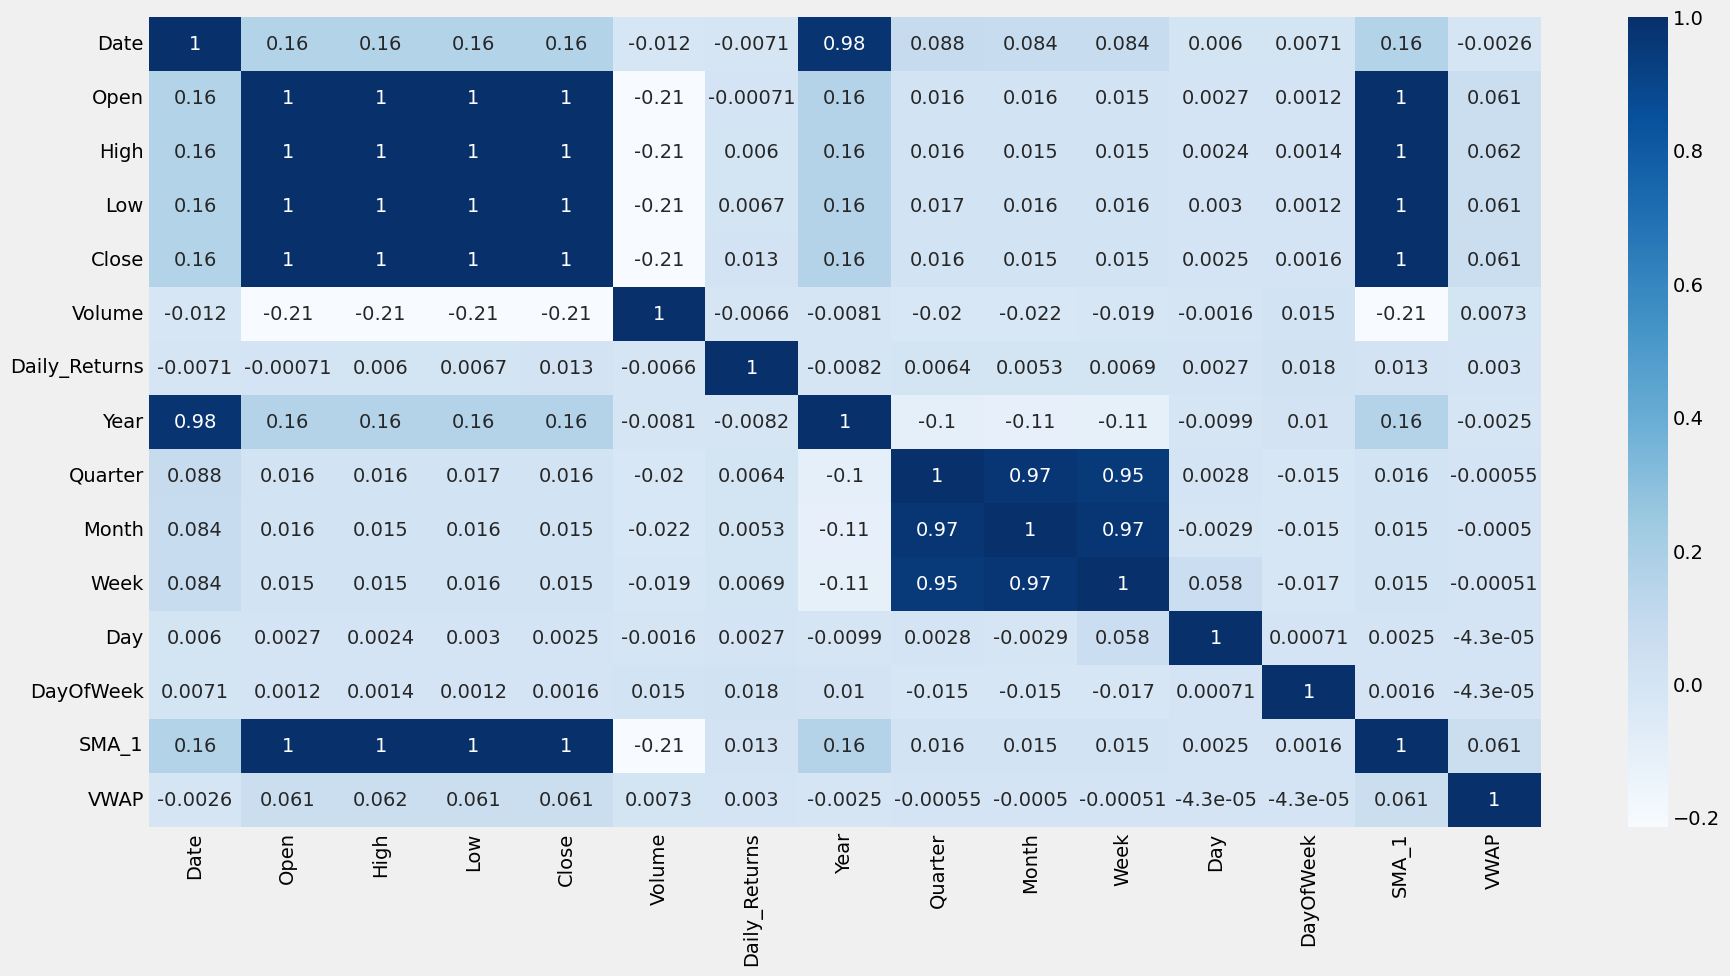

In [31]:
corr = stock_df.drop(['Name', 'IsWeekend'], axis=1).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()